<a href="https://colab.research.google.com/github/WiZXing/leetcode/blob/master/ECE271C_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Load MNIST Dataset
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

x_train = np.vstack([img.reshape(-1,) for img in mnist.train.images])
y_train = mnist.train.labels

x_test = np.vstack([img.reshape(-1,) for img in mnist.test.images])
y_test = mnist.test.labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(np.max(x_train))
print(y_train[0:10])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(10000, 784)
(55000,)
(10000,)
1.0
[7 3 4 6 1 8 1 0 9 8]


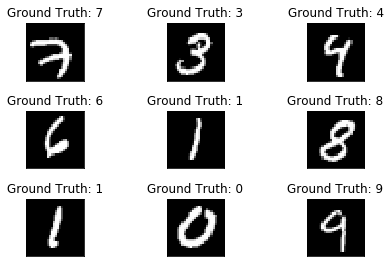

In [151]:
# Show some sample images
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i].reshape((28,28)), cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [152]:
# PCA
import time
p = 10

# Sample
N = 1000
sample_idx = np.random.choice(x_train.shape[0], N, replace=False)
x_sample = x_train[sample_idx]
y_sample = y_train[sample_idx]
print(x_sample.shape)
D = x_train.shape[1]

# Start
ticks_start = time.time()
print("Start Time: {}".format(time.strftime("%H:%M:%S", time.gmtime(ticks_start))))

# Compute Mean 
mean = np.zeros((D))
for i in range(N):
  mean += x_sample[i]
mean /= N
mean_temp = mean
# Center the data
x_c = x_sample.copy()
for i in range(N):
  x_c[i] -= mean
x_c_temp = x_c
  
# Compute Covariance
Sig = np.zeros((D,D))
for i in range(N):
  Sig += x_c[i].reshape(784,1) @ x_c[i].reshape(1,784)
Sig = Sig / N
Sig_temp = Sig
# Compute Eigvalues 
w, v = np.linalg.eigh(Sig)
            

# End
ticks_end = time.time()
print("End Time: {}".format(time.strftime("%H:%M:%S", time.gmtime(ticks_end))))
print("Duration: {}".format(ticks_end - ticks_start)+"s")

(1000, 784)
Start Time: 22:20:38
End Time: 22:20:40
Duration: 2.679630994796753s


In [153]:
# PCA with vectorized statistics
import time
p = 10

# Sample
# N = 1000
# sample_idx = np.random.choice(x_train.shape[0], N, replace=False)
# x_sample = x_train[sample_idx]
# y_sample = y_train[sample_idx]
# print(x_sample.shape)
# D = x_train.shape[1]

# Start
ticks_start = time.time()
print("Start Time: {}".format(time.strftime("%H:%M:%S", time.gmtime(ticks_start))))

# Compute Mean 
mean = np.ones(N).reshape(1,N) @ x_sample
mean /= N
# Center the data
print(mean.shape)
print(x_sample[1].shape)
x_c = x_sample.copy()
for i in range(N):
  x_c[i] -= mean.reshape(D)
  
# Compute Covariance

Sig = np.matmul(x_c,np.transpose(x_c)) /N


# Compute Eigvalues (in ascending order)
w, v = np.linalg.eigh(Sig)


# End
ticks_end = time.time()
print("End Time: {}".format(time.strftime("%H:%M:%S", time.gmtime(ticks_end))))
print("Duration: {}".format(ticks_end - ticks_start)+"s")

Start Time: 22:20:44
(1, 784)
(784,)
End Time: 22:20:44
Duration: 0.36919260025024414s


In [154]:
# PCA with vectorized statistics
import time
import numpy as np


# Sample
# N = 1000
# sample_idx = np.random.choice(x_train.shape[0], N, replace=False)
# x_sample = x_train[sample_idx]
# y_sample = y_train[sample_idx]
# print(x_sample.shape)
# D = x_train.shape[1]

# Start
ticks_start = time.time()
print("Start Time: {}".format(time.strftime("%H:%M:%S", time.gmtime(ticks_start))))


# Compute Mean 
# mean = np.ones(N) @ x_sample
# mean /= N

# Compute Covariance
one_vec = np.ones(N).reshape(N,1)

Sig = ((np.transpose(x_sample) @ (np.eye(N) - (one_vec @ np.transpose(one_vec)) / N)) @ x_sample) /N



# Compute Eigvalues (in ascending order)
w, v = np.linalg.eigh(Sig)
 



# End
ticks_end = time.time()
print("End Time: {}".format(time.strftime("%H:%M:%S", time.gmtime(ticks_end))))
print("Duration: {}".format(ticks_end - ticks_start)+"s")


Start Time: 22:20:47
End Time: 22:20:47
Duration: 0.2762608528137207s


<Figure size 432x288 with 0 Axes>

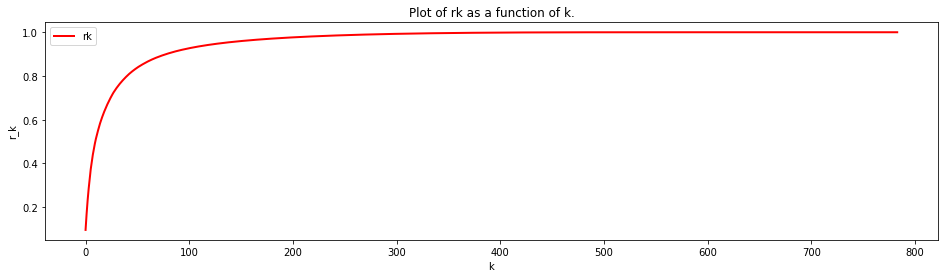

In [155]:
# Plot r_k
import time
import numpy as np




# Compute Eigvalues (in ascending order)
w, v = np.linalg.eigh(Sig_temp)
w = w[::-1]
v = v[:,::-1]

r_sum = 0
r = np.zeros(D)
for k in range(D):
  r_sum += w[k]
  r[k] = r_sum
r /= np.sum(w)

# Plot ratio r_k
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.linspace(0,D-1,D)         
y = r
plt.figure(figsize=(16,4))         
plt.plot(x,y,label = 'rk',color = 'red',linewidth = 2)  
plt.xlabel('k')            
plt.ylabel('r_k')
plt.title('Plot of rk as a function of k.') 
plt.legend()                        
plt.show()         

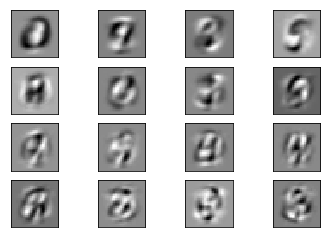

In [156]:
# Plot the eigenvalues
phi = v[:,0:16]
fig = plt.figure()
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(phi[:,i].reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

p=6


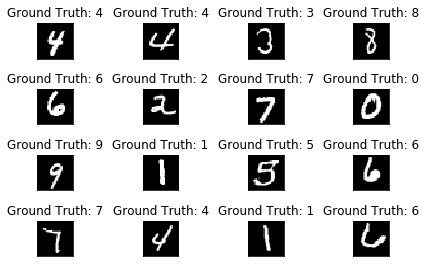

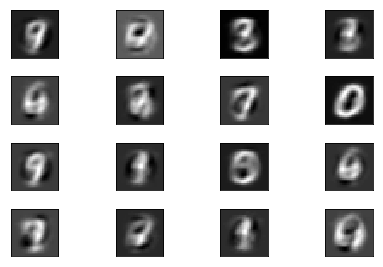

In [158]:
# Find lowest p for r > 0.4
p = np.searchsorted(r,0.4, side='right')
print("p={}".format(p))
phi = v[:,0:p]
# Test Sample
n = 16
sample_idx = np.random.choice(x_test.shape[0], n, replace=False)
x_test_sample = x_test[sample_idx]
y_test_sample = y_test[sample_idx]
D = x_train.shape[1]

# Show Original Images
fig = plt.figure()
coeff = np.zeros((p,n))
for i in range(n):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(x_test_sample[i].reshape((28,28)), cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(y_test_sample[i]))
  plt.xticks([])
  plt.yticks([])
  coeff[:,i] = np.matmul(np.transpose(phi),x_test_sample[i]-mean_temp.reshape(D))



# Show Reconstructed Images
fig = plt.figure()
for i in range(n):
  x_r = np.matmul(phi,coeff[:,i])+mean_temp.reshape(D)
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(x_r.reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

p=25


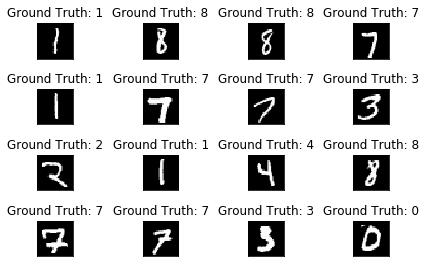

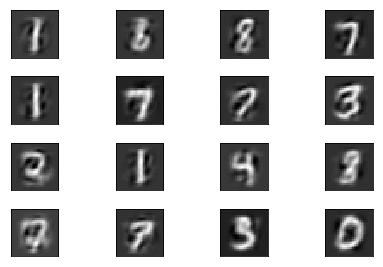

In [160]:
# Find lowest p for r > 0.7
p = np.searchsorted(r,0.7, side='right')
print("p={}".format(p))
phi = v[:,0:p]
# Test Sample
n = 16
sample_idx = np.random.choice(x_test.shape[0], n, replace=False)
x_test_sample = x_test[sample_idx]
y_test_sample = y_test[sample_idx]
D = x_train.shape[1]

# Show Original Images
fig = plt.figure()
coeff = np.zeros((p,n))
for i in range(n):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(x_test_sample[i].reshape((28,28)), cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(y_test_sample[i]))
  plt.xticks([])
  plt.yticks([])
  coeff[:,i] = np.matmul(np.transpose(phi),x_test_sample[i]-mean_temp.reshape(D))



# Show Reconstructed Images
fig = plt.figure()
for i in range(n):
  x_r = np.matmul(phi,coeff[:,i])+mean_temp.reshape(D)
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(x_r.reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

p=78


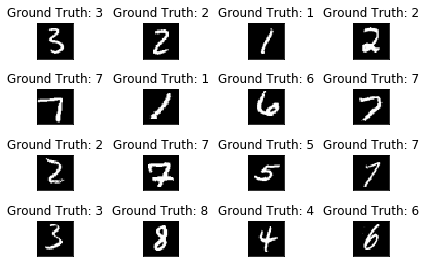

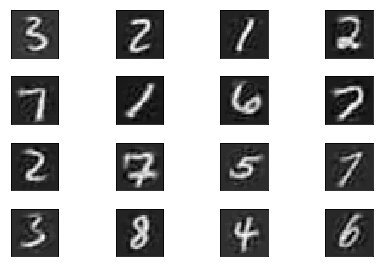

In [161]:
# Find lowest p > 0.9
p = np.searchsorted(r,0.9, side='right')
print("p={}".format(p))
phi = v[:,0:p]
# Test Sample
n = 16
sample_idx = np.random.choice(x_test.shape[0], n, replace=False)
x_test_sample = x_test[sample_idx]
y_test_sample = y_test[sample_idx]
D = x_train.shape[1]

# Show Original Images
fig = plt.figure()
coeff = np.zeros((p,n))
for i in range(n):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(x_test_sample[i].reshape((28,28)), cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(y_test_sample[i]))
  plt.xticks([])
  plt.yticks([])
  coeff[:,i] = np.matmul(np.transpose(phi),x_test_sample[i]-mean_temp.reshape(D))



# Show Reconstructed Images
fig = plt.figure()
for i in range(n):
  x_r = np.matmul(phi,coeff[:,i])+mean_temp.reshape(D)
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(x_r.reshape((28,28)), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])